In [37]:
import numpy as np
from sklearn.model_selection import train_test_split 


In [59]:
np.random.seed(0)
l = 200
beta = 0.5

x = np.linspace(-2, 2, 200)
w = np.array([1.,2.,3.])
y = np.exp(w[0]*x) + w[1]*np.sin(x*w[2]) + beta*np.random.randn(l)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=50)

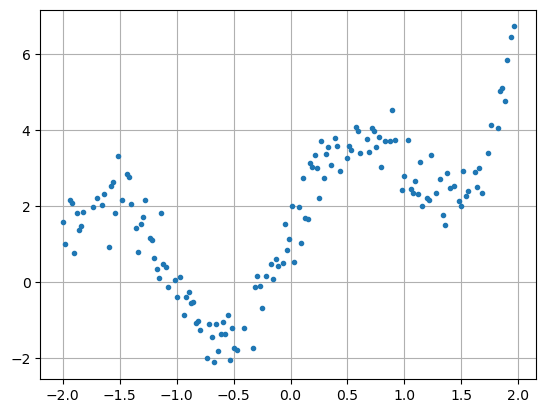

In [60]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, '.')
plt.grid()
plt.show()

In [61]:
import torch
def f(x,w):
    return torch.exp(w[0]*x)+w[1]*torch.sin(x*w[2])

In [62]:
torch.manual_seed(0)
w_hat = torch.randn(3)
w_hat.requires_grad = True

X_tr = torch.FloatTensor(x_train)
y_tr = torch.FloatTensor(y_train)

loss_function = torch.nn.MSELoss()
optim = torch.optim.SGD([w_hat], lr=0.01)

In [63]:
from tqdm import tqdm

In [64]:
for i in tqdm(range(1,1000), leave=False):
    optim.zero_grad()
    loss = loss_function(f(X_tr, w_hat), y_tr)
    loss.backward()
    optim.step()


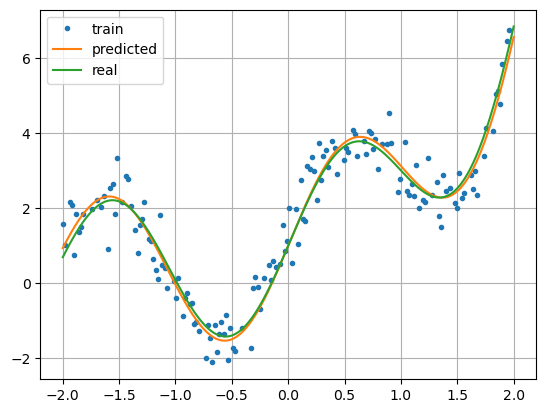

In [65]:
plt.plot(x_train, y_train,'.', label='train')
x = np.linspace(-2, 2, 2000)
plt.plot(x, f(torch.Tensor(x), w_hat).detach().cpu().numpy(), label='predicted')
x = np.linspace(-2, 2, 2000)
plt.plot(x, f(torch.Tensor(x), torch.tensor(w)).detach().cpu().numpy(), label='real')
plt.legend(loc='best')
plt.grid()
plt.show()